# A Notebook to use Decision Tree Classifiers

This notebook shows how to train a decision tree to classify unseen instances. This notebook uses the [Iris dataset](https://archive.ics.uci.edu/dataset/53/iris), which is often used in calssification examples. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper.

**Question 1**: What type of data is this? Under which license is the data released? What do you need to do to be able to use it?

## Loading the data

A copy of the data is contained in the dataset folder that you downloaded with your exercise. Upload it to your workspace.

## Understanding the code

The code you are using here uses predefined functions from the sklearn library of machine learning primitives and from the graphviz library to generate visualizations. A few more details about the code:
* The variable "dataset" stores the name of text file that you input and is passed as an argument of the function "loadDataSet()".
* The variable "attributes" stores the names of all features. The variable "instances" stores the values of all features in the training set. The variable "labels" stores the labels of all instances.
* The variable "clf" stores a decision tree model, and it can be trained with "instances" and "labels". Once the model is trained, it can be used to predict unseen instances. We use a type of decision tree algorithm called CART (Classification and Regression Trees).
The variable "n_foldCV" stores the number of times of n-fold cross validation that you input.
* The function "cross_val_scores" assesses the accuracy scores of a decision tree model. Its inputs are "clf", "instances", "labels", "n_foldCV".
* The variable "scores" stores the accuracy of an n-fold cross validation of the model.

# *Question 1

csv tabular data, under a Creative Commons Attribution 4.0 International
give credit to author

## Package import and function definition

Import packages and define a few custom functions

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import graphviz
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def loadDataSet(dataset):
    with open(dataset) as f:
        data=f.readlines()
        attributes=data[0].rstrip().split(',')[:-1]
        instances=[entry.rstrip().split(',')[:-1] for entry in data[1:]]
        dataArray=[]
        for i in range(len(instances[0])):
            dataArray.append([float(instance[i]) for instance in instances])
        instances=np.array(dataArray).T
        labels=[entry.rstrip().split(',')[-1] for entry in data[1:]]
        return attributes,instances,labels

## Data exploration

Before we train our classifier, it is always a good idea to have a look at the dataset we are working with. In particular, we will be looking for the following:
1. What are the features and classes in the dataset?
2. Are there missing values in the dataset?
3. Are the number of instances in each class balanced?
4. How distinct are the features?

Let's load the data and look at the columns.

In [2]:
dataset = "iris.csv"
df=pd.read_csv(dataset)
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,type of iris plant
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Question 2**: Based on the table and the description of the dataset, which column(s) contain the features and which column(s) contain the labels for the classes?

The cell below computes how many rows in each column contain NaNs (missing values).

# *Question 2

everything besides last one is features, last column us labels for the classes

In [3]:
df.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
type of iris plant    0
dtype: int64

**Question 3**: Do you have any missing values in your dataset?

The cell below contains a code to calculate the number of instances in each class.

In [4]:
label_name = "type of iris plant" # assign a variable to the lenghty column name
print(df[label_name].value_counts())

type of iris plant
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


**Question 4**: Is this dataset balanced?

In the next few cells, let's try to determine whether the various classes are differentiable enough. First, let's look at histograms of the data.

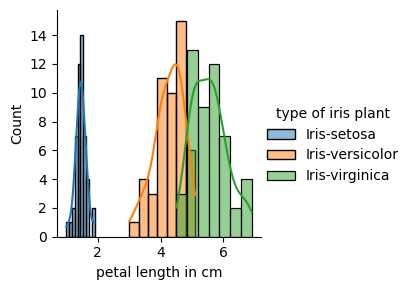

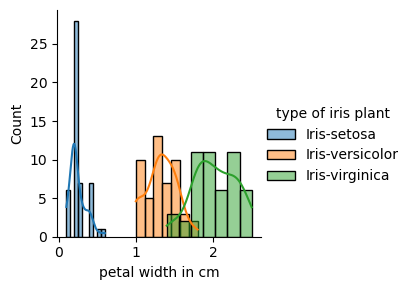

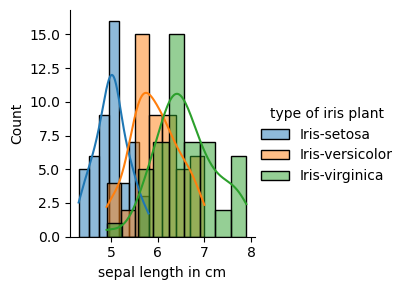

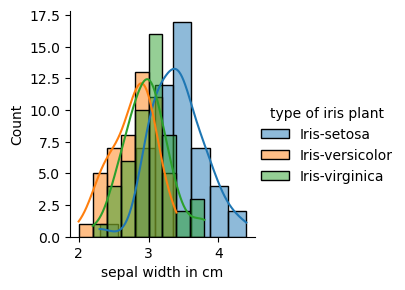

In [5]:
pl = 'petal length in cm'
pw = 'petal width in cm'
sl = 'sepal length in cm'
sw = 'sepal width in cm'

features  = [pl,pw,sl,sw]

for item in features:

  sns.FacetGrid(df,hue=label_name).map(sns.histplot,item, kde=True, alpha=0.5).add_legend()

plt.show()

**Question 5**: Based on these histograms, what are the most distinguishing features?

Next, we will use a pairplot to get a better understanding of the relationships within the dataset.

# * PL and PW

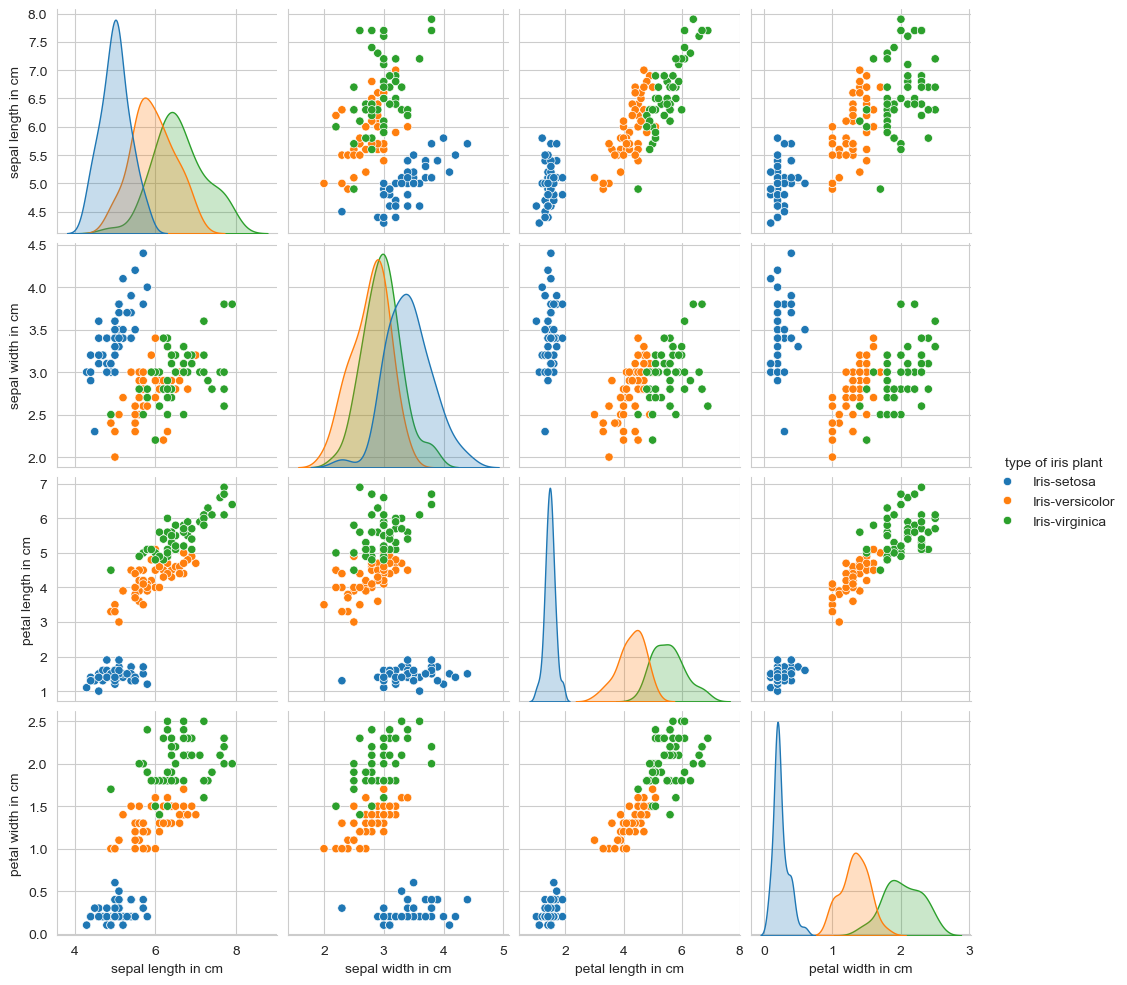

In [6]:
sns.set_style("whitegrid")
sns.pairplot(df,hue=label_name);
plt.show()

**Question 6** How do you read this plot? What information can you gather from this?

## Training: Building a Decision Tree Classifier

Here, we will be training a decision tree classifier for the iris dataset.

In [7]:
attributes,instances,labels=loadDataSet(dataset)
clf = tree.DecisionTreeClassifier()
clf.fit(instances,labels)

DecisionTreeClassifier()

## Visualizing a Decision Tree

The following cell will generate a visualization of the decision tree.

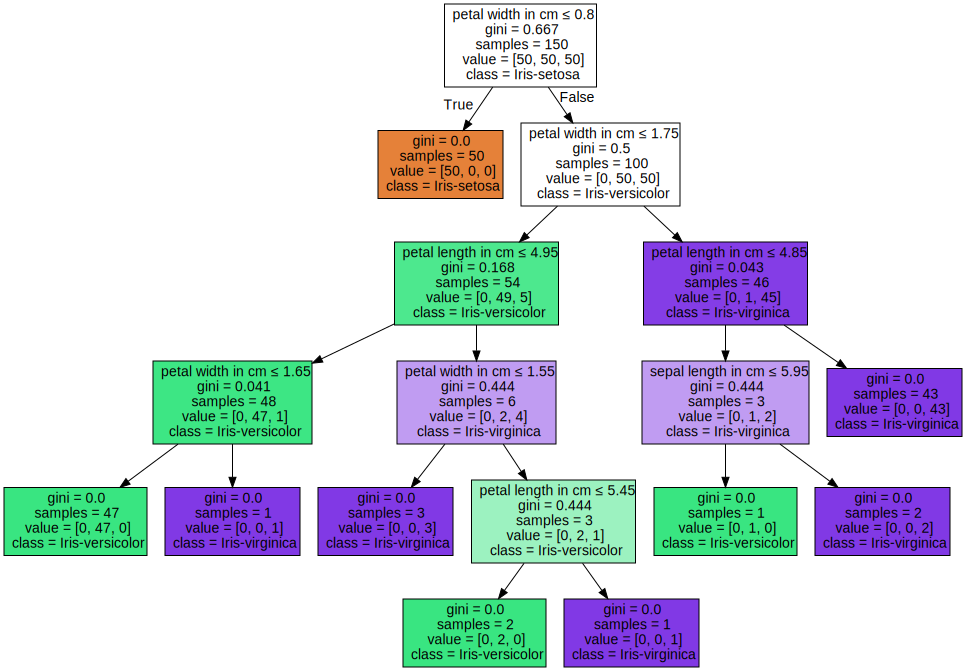

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None,max_depth=5,\
feature_names=attributes,class_names=clf.classes_,label='all',\
filled=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

**Question 7**: Read through the tree and try to understand what it happening. Do some of these assumptions match what you would expect from the data exploration step?

Note: The gini impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.

## Evaluating the Accuracy of a Decision Tree Classifier¶

The following cell will run cross-validation to evaluate your decision tree classifier.

K Fold Cross-Validation is used to estimate prediction error. The dataset is randomly divided into K folds. The first fold acts as the validation set while the method is fit on remaining K-1 folds. Mean Squared Error is calculated on the observations from the held-out fold. The process is repeated K times, taking a different part each time.

![Cross-validation](https://miro.medium.com/max/2000/1*fW_qNKmvmg8duWoQnp_PoQ.png)

In [13]:
n_foldCV = 4
attributes,instances,labels=loadDataSet(dataset)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(instances,labels)
scores = cross_val_score(clf, instances, labels, cv=n_foldCV)

The following cell will output the accuracy score for each fold and the accuracy estimate of the model under 95% confidence interval.

In [16]:
print("Scores:")
[print(score) for score in scores]
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:
0.9736842105263158
0.9473684210526315
0.9459459459459459
0.972972972972973
Accuracy: 0.96 (+/- 0.03)


## Prediction: Classifying New Instances Using a Decision Tree Classifier

The cell below classifies new instances with the decision tree you created.

When you are prompted to input a prediction set, please create an example of an instance that looks like the instances in the training set.

In [17]:
testset = "5,3,1,0.1"
testset=testset.strip().split(",")
temp=[]
for i in range(len(testset)):
        temp.append(float(testset[i]))
testset=np.array(temp).reshape((1,len(temp)))
predictions=clf.predict(testset)
print(predictions)



['Iris-setosa']


**Question 8**: Does this prediction match with the prediction visualized tree?

This content is protected and may not be shared, uploaded, or distributed.